# Importando bibliotecas

In [2]:
# Passo 1: Instalar as bibliotecas necessárias (caso ainda não estejam instaladas)
#!pip install pandas requests
#!pip install seaborn
#!pip install tqdm
!pip install pycaret

# Importar as bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import pandas as pd
from pycaret.classification import *




# Importando dataset do kaggle
Import + unzip

In [3]:
#verifica se ja foi baixado/extraido e baixa

# Verificar se o arquivo já foi baixado
if not os.path.exists('/content/paysim1.zip'):
    # Baixar o dataset
    !kaggle datasets download -d ealaxi/paysim1
else:
    print("O arquivo 'paysim1.zip' já foi baixado.")

# Verificar se o arquivo já foi descompactado
if not os.path.exists('/content/PS_20174392719_1491204439457_log.csv'):
    # Descompactar o arquivo
    !unzip paysim1.zip
else:
    print("O arquivo já foi descompactado.")


Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
100% 177M/178M [00:01<00:00, 146MB/s]
100% 178M/178M [00:01<00:00, 135MB/s]
Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [4]:
#transformar csv em df
import pandas as pd
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')


In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Analise Exploratória e Tratamento de dados

In [8]:
#Validação de dados nulos
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [9]:
# Verificar se existem linhas duplicadas
if df.duplicated().any():
  print("Existem linhas duplicadas no DataFrame.")
else:
  print("Não existem linhas duplicadas no DataFrame.")


Não existem linhas duplicadas no DataFrame.


In [10]:
df['valor_movimentado_Orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['valor_movimentado_Dest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [11]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,valor_movimentado_Orig,valor_movimentado_Dest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


Verificar se todo dinheiro movimentado chegou a algum destino. Assim validando quais dados usar

In [12]:
#Comparando as movimentações para identificar se o valor que saiu da origem chegou no destinatário
df['comparacao'] = df['valor_movimentado_Orig'].abs() - df['valor_movimentado_Dest'].abs()

#Analisando a quantidade de zeros (quantidade correta de transações)
zeros = (df['comparacao'] == 0).sum()

#Calculando a média de transações corretas
media = zeros/len(df['comparacao'])
print("Apenas", zeros, "das", len(df['comparacao']), "transações estão corretas")
print("Uma média de", f"{(media*100):.2f}%")

Apenas 1016411 das 6362620 transações estão corretas
Uma média de 15.97%


In [13]:

# Filtrar o DataFrame para incluir apenas as transações onde 'comparacao' é igual a 0
df_transacoes_corretas = df[df['comparacao'] == 0]

# Contar o número de fraudes nessas transações
quantidade_fraudes_transacoes_corretas = df_transacoes_corretas['isFraud'].sum()

print("Quantidade de fraudes com 'comparacao' igual a 0:", quantidade_fraudes_transacoes_corretas)


Quantidade de fraudes com 'comparacao' igual a 0: 2177


In [14]:

# Filtrar o DataFrame para incluir apenas as transações onde 'comparacao' é diferente de 0
df_transacoes_incorretas = df[df['comparacao'] != 0]

# Contar o número de fraudes nessas transações
quantidade_fraudes_transacoes_incorretas = df_transacoes_incorretas['isFraud'].sum()

print("Quantidade de fraudes com 'comparacao' diferente de 0:", quantidade_fraudes_transacoes_incorretas)


Quantidade de fraudes com 'comparacao' diferente de 0: 6036


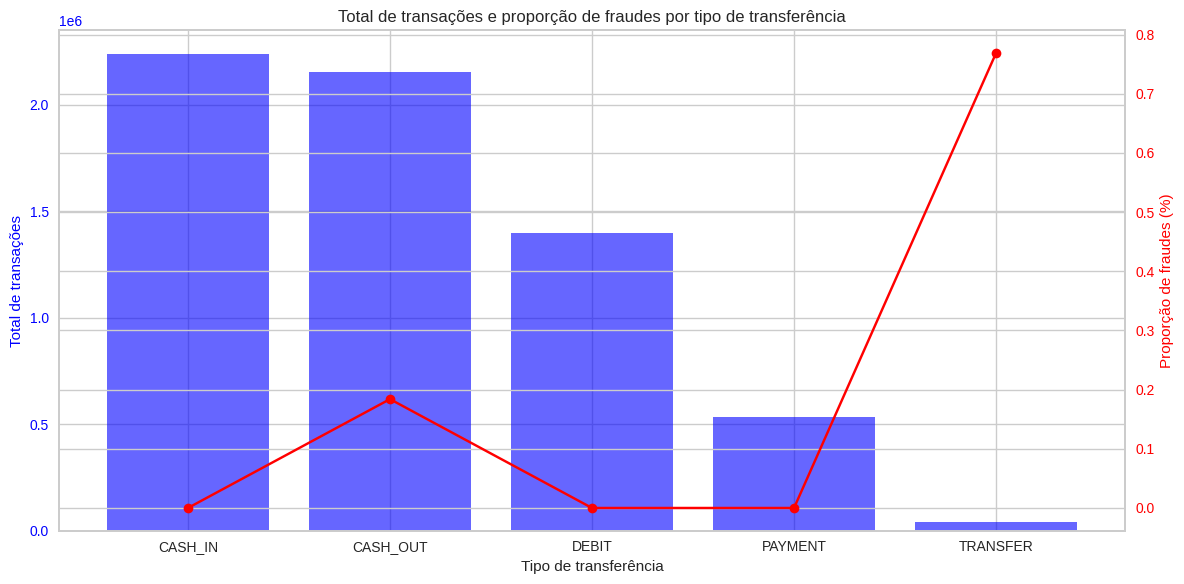

In [15]:
# Visualização da proporção de fraudes em relação ao total de cada tipo de transferência:

# Proporção de fraudes por tipo de transferência
fraud_proportion = df.groupby('type')['isFraud'].mean() * 100
total_transactions = df['type'].value_counts()

# Plotando a proporção de fraudes e total de transações lado a lado
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para o total de transações por tipo
ax1.bar(total_transactions.index, total_transactions.values, color='blue', alpha=0.6, label='Total de transações')
ax1.set_xlabel('Tipo de transferência')
ax1.set_ylabel('Total de transações', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Gráfico de linhas para a proporção de fraudes
ax2 = ax1.twinx()
ax2.plot(fraud_proportion.index, fraud_proportion.values, color='red', marker='o', label='Proporção de fraudes')
ax2.set_ylabel('Proporção de fraudes (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total de transações e proporção de fraudes por tipo de transferência')
fig.tight_layout()
plt.show()

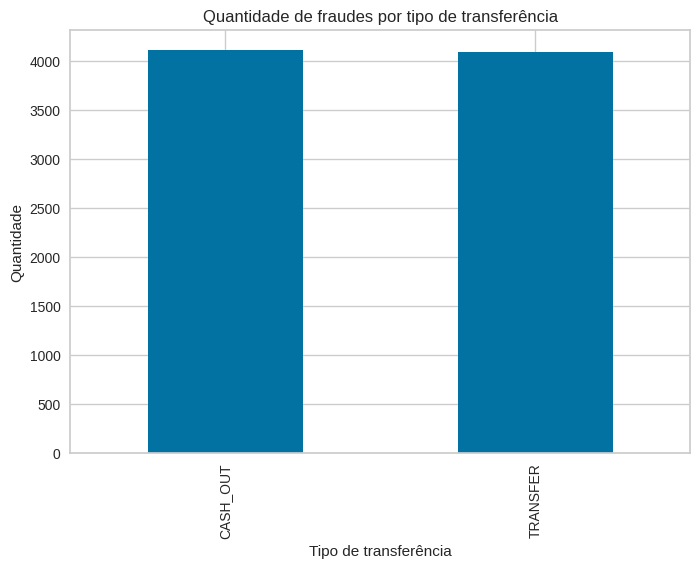

In [16]:
#Quantidade de fraudes por tipo de transferência

fraude_tipo = df[df['isFraud'] == 1]['type'].value_counts()
fraude_tipo.plot(kind='bar')
plt.title('Quantidade de fraudes por tipo de transferência')
plt.xlabel('Tipo de transferência')
plt.ylabel('Quantidade')
plt.show()

In [17]:
fraude_tipo

,count
type,
CASH_OUT,4116
TRANSFER,4097


In [18]:
# Remover as linhas que possuem Payment, cash_in e debit, pois não possuem fraudes
df = df[~df['type'].isin(['PAYMENT', 'CASH_IN', 'DEBIT'])]

In [19]:
df.shape

(2770409, 14)

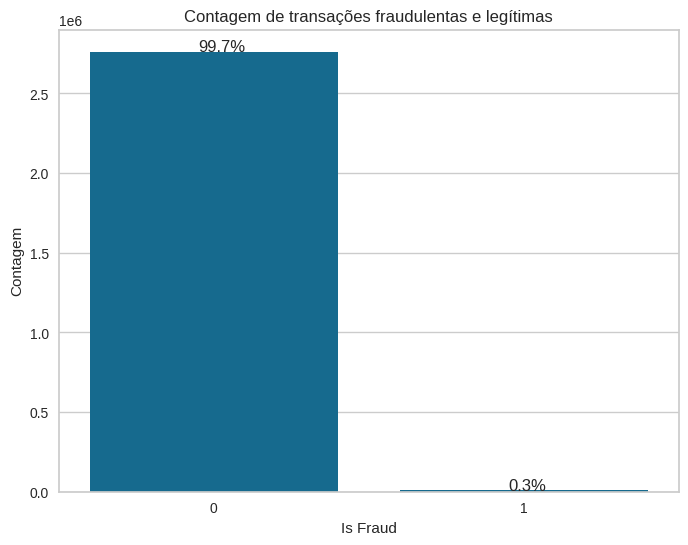

NameError: name 'fraud_count' is not defined

In [20]:

import matplotlib.pyplot as plt
# Gráfico de contagem de cada valor na coluna "isFraud" com porcentagem
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='isFraud', data=df)
plt.title('Contagem de transações fraudulentas e legítimas')
plt.xlabel('Is Fraud')
plt.ylabel('Contagem')

# Calcular a porcentagem de cada valor
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), fontsize=12)

plt.show()

print(f"Número de transações fraudulentas: {fraud_count}")
print(f"Número de transações legítimas: {legit_count}")
print(f"Proporção de fraudes: {(fraud_count / total_count) * 100:.2f}%")

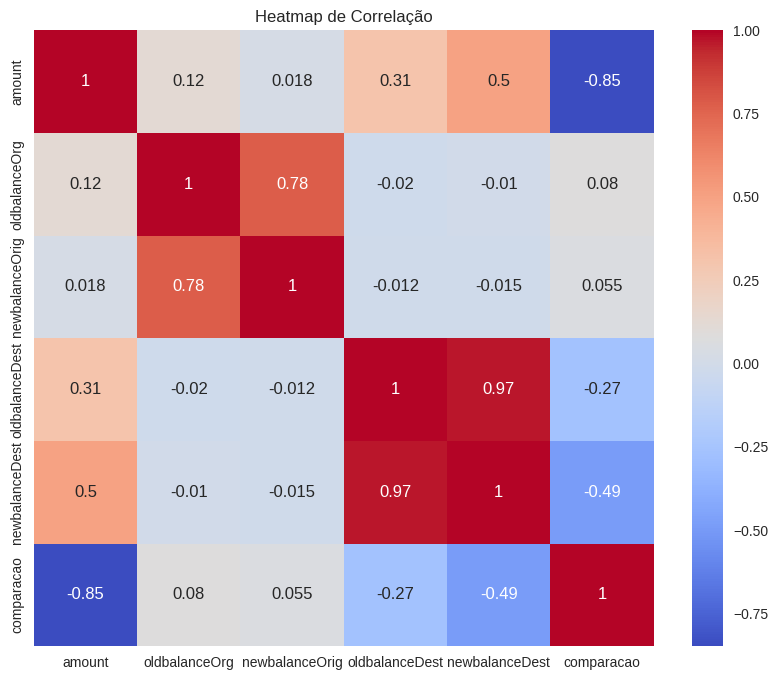

In [21]:
# prompt: heatmap de amount	oldbalanceOrg	newbalanceOrig	oldbalanceDest	newbalanceDest

import matplotlib.pyplot as plt
# Selecionar as colunas desejadas
df_heatmap = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'comparacao']]

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()


## Retirando coluna que será descoberta (isFlaggedFraud)

In [22]:
df = df.drop(['isFlaggedFraud', 'valor_movimentado_Orig', 'valor_movimentado_Dest','comparacao'], axis=1)

In [23]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0


## Transformando 'type' em dummy e retirando colunas object

In [24]:
df['type'].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [25]:
df = df.drop(['step'], axis=1)

In [26]:
# Transformar a coluna 'type' em variáveis dummy
df = pd.get_dummies(df, columns=['type'])

# Remover colunas de objetos/strings
df = df.select_dtypes(exclude=['object'])

In [27]:
df.head(10)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
2,181.00,181.00,0.0,0.0,0.00,1,False,True
3,181.00,181.00,0.0,21182.0,0.00,1,True,False
15,229133.94,15325.00,0.0,5083.0,51513.44,0,True,False
19,215310.30,705.00,0.0,22425.0,0.00,0,False,True
24,311685.89,10835.00,0.0,6267.0,2719172.89,0,False,True
42,110414.71,26845.41,0.0,288800.0,2415.16,0,True,False
47,56953.90,1942.02,0.0,70253.0,64106.18,0,True,False
48,5346.89,0.00,0.0,652637.0,6453430.91,0,True,False
51,23261.30,20411.53,0.0,25742.0,0.00,0,True,False
58,62610.80,79114.00,16503.2,517.0,8383.29,0,False,True


In [28]:
colunas = [col for col in df.columns if col != 'isFraud'] + ['isFraud']
df = df[colunas]

In [29]:
df.head(10)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_TRANSFER,isFraud
2,181.00,181.00,0.0,0.0,0.00,False,True,1
3,181.00,181.00,0.0,21182.0,0.00,True,False,1
15,229133.94,15325.00,0.0,5083.0,51513.44,True,False,0
19,215310.30,705.00,0.0,22425.0,0.00,False,True,0
24,311685.89,10835.00,0.0,6267.0,2719172.89,False,True,0
42,110414.71,26845.41,0.0,288800.0,2415.16,True,False,0
47,56953.90,1942.02,0.0,70253.0,64106.18,True,False,0
48,5346.89,0.00,0.0,652637.0,6453430.91,True,False,0
51,23261.30,20411.53,0.0,25742.0,0.00,True,False,0
58,62610.80,79114.00,16503.2,517.0,8383.29,False,True,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   type_CASH_OUT   bool   
 6   type_TRANSFER   bool   
 7   isFraud         int64  
dtypes: bool(2), float64(5), int64(1)
memory usage: 153.2 MB


# Separando em treino e teste

In [31]:
# Separando em treino e teste com shuffle
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('isFraud', axis=1),
    df['isFraud'],
    test_size=0.2,
    random_state=42,
    shuffle=True
)


In [32]:
print(X_train.shape, X_test.shape)

(2216327, 7) (554082, 7)


In [33]:
X_train.head(10)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_TRANSFER
1326860,256796.36,0.0,0.00,826969.43,1083765.80,True,False
3095732,76426.86,20808.0,0.00,398149.07,474575.92,True,False
4353969,173912.66,0.0,0.00,465746.64,639659.30,True,False
529479,197978.48,204571.0,6592.52,0.00,197978.48,True,False
3996516,352228.73,1484.0,0.00,163019.07,515247.80,True,False
6348142,36168.30,124010.0,87841.70,0.00,36168.30,True,False
1613864,208319.14,0.0,0.00,6866248.23,7074567.37,True,False
3107877,45524.56,0.0,0.00,467469.91,512994.46,True,False
707320,246913.74,20324.0,0.00,0.00,413225.64,True,False
210518,204765.62,20406.0,0.00,11763762.61,11968528.23,True,False


In [34]:
#Considerando que julgue tudo como NÃO Fraude qual seria a porcentagem
print("CONSIDERANDO COMO NÃO FRAUDE, TARGET")

y_pred = np.zeros(554082)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Matriz de Confusão da Random Forest:\n",confusion_matrix(y_test, y_pred))
roc = roc_auc_score(y_test, y_pred)
print("Valor ROC", roc)

CONSIDERANDO COMO NÃO FRAUDE, TARGET
Acurácia: 0.9970293205698796
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.00      0.00      0.00      1646

    accuracy                           1.00    554082
   macro avg       0.50      0.50      0.50    554082
weighted avg       0.99      1.00      1.00    554082

Matriz de Confusão da Random Forest:
 [[552436      0]
 [  1646      0]]
Valor ROC 0.5


# Random Forest

In [35]:
# Criar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42,verbose=3,n_estimators=10)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliar o modelo
print("RANDOM FOREST")
print("Acurácia da Random Forest:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Matriz de Confusão da Random Forest:\n",confusion_matrix(y_test, y_pred))
roc = roc_auc_score(y_test, y_pred)
print("Valor ROC", roc)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
RANDOM FOREST
Acurácia da Random Forest: 0.9992528181749272
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.96      0.78      0.86      1646

    accuracy                           1.00    554082
   macro avg       0.98      0.89      0.93    554082
weighted avg       1.00      1.00      1.00    554082

Matriz de Confusão da Random Forest:
 [[552386     50]
 [   364   1282]]
Valor ROC 0.889383664479639


# Redes Neurais

In [37]:
# Criar o modelo de rede neural
mlp_model = MLPClassifier(hidden_layer_sizes=(5, 10, 20), max_iter=15, random_state=42, verbose=1,tol=0.0001,alpha=0.001)

# Treinar o modelo com os dados de treinamento
mlp_model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred_mlp = mlp_model.predict(X_test)

# Avaliar o modelo
print("Acurácia da Rede Neural:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
print("Matriz de Confusão da Rede Neural:\n", confusion_matrix(y_test, y_pred_mlp))
roc = roc_auc_score(y_test, y_pred_mlp)
print("Valor ROC", roc)

Iteration 1, loss = 0.14885716
Iteration 2, loss = 0.04384979
Iteration 3, loss = 0.02712040
Iteration 4, loss = 0.02093996
Iteration 5, loss = 0.02031637
Iteration 6, loss = 0.02052056
Iteration 7, loss = 0.02128196
Iteration 8, loss = 0.02238245
Iteration 9, loss = 0.02031116
Iteration 10, loss = 0.02210186
Iteration 11, loss = 0.01515198
Iteration 12, loss = 0.02058129
Iteration 13, loss = 0.01767525
Iteration 14, loss = 0.02090302
Iteration 15, loss = 0.01453946
Acurácia da Rede Neural: 0.9983269624351631
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.91      0.48      0.63      1646

    accuracy                           1.00    554082
   macro avg       0.96      0.74      0.82    554082
weighted avg       1.00      1.00      1.00    554082

Matriz de Confusão da Rede Neural:
 [[552359     77]
 [   850    796]]
Valor ROC 0.7417286075756794


# KNN

In [38]:
# Criar o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Defina o número de vizinhos (k)

# Treinar o modelo
knn_model.fit(X_train, y_train)

# Fazer previsões
y_pred_knn = knn_model.predict(X_test)

# Avaliar o modelo
print("Acurácia do KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Matriz de Confusão do KNN:\n", confusion_matrix(y_test, y_pred_knn))

roc = roc_auc_score(y_test, y_pred_knn)
print("Valor ROC", roc)


Acurácia do KNN: 0.9989405900209716
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.87      0.76      0.81      1646

    accuracy                           1.00    554082
   macro avg       0.93      0.88      0.90    554082
weighted avg       1.00      1.00      1.00    554082

Matriz de Confusão do KNN:
 [[552249    187]
 [   400   1246]]
Valor ROC 0.8783240667577382


# Pycaret

In [ ]:
# Amostrar apenas 1% dos dados para acelerar os testes
df_sampled = df.sample(frac=0.01, random_state=123)

# Configuração do PyCaret com dataset amostrado, uso de todos os núcleos e 3 folds para validação
clf = setup(data=df_sampled, target='isFraud', session_id=123, normalize=True,
            fix_imbalance=True, fold=3, n_jobs=-1, log_experiment=False, experiment_name="fraud_detection")

# Comparando apenas alguns modelos rápidos
best_model = compare_models(include=['knn', 'mlp', 'rf'])  # 'lr' = Logistic Regression, 'dt' = Decision Tree, 'rf' = Random Forest

# Criando o modelo com o melhor algoritmo encontrado
model = create_model(best_model)

# Ajustando o modelo com tuning limitado (10 iterações)
tuned_model = tune_model(model, n_iter=10)

# Avaliando o modelo ajustado
evaluate_model(tuned_model)

# Fazendo previsões
predictions = predict_model(tuned_model)


,Description,Value
0,Session id,123
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(27704, 8)"
4,Transformed data shape,"(46982, 8)"
5,Transformed train set shape,"(38670, 8)"
6,Transformed test set shape,"(8312, 8)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9970,0.9680,0.7895,0.5053,0.6150,0.6136,0.6296,2.4967
mlp,MLP Classifier,0.9928,0.9804,0.8772,0.2793,0.4218,0.4192,0.4912,21.2300
knn,K Neighbors Classifier,0.9900,0.9004,0.7895,0.2087,0.3270,0.3239,0.4002,3.0367


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9981,0.9993,0.8947,0.6296,0.7391,0.7382,0.7497
1,0.9955,0.9635,0.6316,0.3529,0.4528,0.4508,0.4701
2,0.9974,0.9413,0.8421,0.5333,0.6531,0.6518,0.6690
Mean,0.9970,0.9680,0.7895,0.5053,0.6150,0.6136,0.6296
Std,0.0011,0.0239,0.1137,0.1147,0.1199,0.1204,0.1175


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9839,0.9981,0.9474,0.1488,0.2571,0.2533,0.3720
1,0.9855,0.9863,0.8421,0.1495,0.2540,0.2502,0.3513
2,0.9859,0.9358,0.7895,0.1471,0.2479,0.2442,0.3371
Mean,0.9851,0.9734,0.8596,0.1485,0.2530,0.2493,0.3535
Std,0.0009,0.0270,0.0656,0.0010,0.0038,0.0038,0.0143


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9965,0.9767,0.8400,0.4565,0.5915,0.5900,0.6178


# Smote (balancear dados)


In [39]:
# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificar as contagens de classe antes e depois
print(f"Antes do balanceamento: {y_train.value_counts()}")
print(f"Depois do balanceamento: {y_resampled.value_counts()}")

Antes do balanceamento: isFraud
0    2209760
1       6567
Name: count, dtype: int64
Depois do balanceamento: isFraud
0    2209760
1    2209760
Name: count, dtype: int64


In [40]:
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled.shape

(4419520, 8)

In [41]:
df_amostra = df_resampled.sample(frac=0.05, random_state=123)
df_amostra.shape

(220976, 8)

In [42]:
X_resampled = df_amostra.iloc[:, :-1]
y_resampled = df_amostra.iloc[:, -1]

In [43]:
df_resampled_test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
df_resampled_test.shape

(554082, 8)

In [44]:
df_amostra_test = df_resampled_test.sample(frac=0.05, random_state=123)
df_amostra_test.shape

(27704, 8)

In [45]:
X_resampled_test = df_amostra_test.iloc[:, :-1]
y_resampled_test = df_amostra_test.iloc[:, -1]

## KNN Balancead

In [46]:
# Criar o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Defina o número de vizinhos (k)

# Treinar o modelo
knn_model.fit(X_resampled, y_resampled)

# Fazer previsões
y_pred_knn = knn_model.predict(X_resampled_test)

# Avaliar o modelo
print("Acurácia do KNN:", accuracy_score(y_resampled_test, y_pred_knn))
print(classification_report(y_resampled_test, y_pred_knn))
print("Matriz de Confusão do KNN:\n", confusion_matrix(y_resampled_test, y_pred_knn))

roc = roc_auc_score(y_resampled_test, y_pred_knn)
print("Valor ROC", roc)

Acurácia do KNN: 0.9759601501588219
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     27610
           1       0.12      0.95      0.21        94

    accuracy                           0.98     27704
   macro avg       0.56      0.96      0.60     27704
weighted avg       1.00      0.98      0.99     27704

Matriz de Confusão do KNN:
 [[26949   661]
 [    5    89]]
Valor ROC 0.9614339547034298


## Redes Neurais Balanced

In [47]:
# Criar o modelo de rede neural
mlp_model = MLPClassifier(hidden_layer_sizes=(5, 10, 20), max_iter=15, random_state=42, verbose=1,tol=0.0001,alpha=0.001)

# Treinar o modelo com os dados de treinamento
mlp_model.fit(X_resampled, y_resampled)

# Fazer previsões com os dados de teste
y_pred_mlp = mlp_model.predict(X_resampled_test)

# Avaliar o modelo
print("Acurácia da Rede Neural:", accuracy_score(y_resampled_test, y_pred_mlp))
print(classification_report(y_resampled_test, y_pred_mlp))
print("Matriz de Confusão da Rede Neural:\n", confusion_matrix(y_resampled_test, y_pred_mlp))
roc = roc_auc_score(y_resampled_test, y_pred_mlp)
print("Valor ROC", roc)


Iteration 1, loss = 1.36269860
Iteration 2, loss = 0.72506386
Iteration 3, loss = 0.50270655
Iteration 4, loss = 0.52924593
Iteration 5, loss = 0.47793470
Iteration 6, loss = 0.55548540
Iteration 7, loss = 0.53483024
Iteration 8, loss = 0.52343951
Iteration 9, loss = 0.53633832
Iteration 10, loss = 0.54214485
Iteration 11, loss = 0.55816981
Iteration 12, loss = 0.50850945
Iteration 13, loss = 0.51217047
Iteration 14, loss = 0.53213584
Iteration 15, loss = 0.50801048
Acurácia da Rede Neural: 0.998014727115218
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27610
           1       0.83      0.52      0.64        94

    accuracy                           1.00     27704
   macro avg       0.91      0.76      0.82     27704
weighted avg       1.00      1.00      1.00     27704

Matriz de Confusão da Rede Neural:
 [[27600    10]
 [   45    49]]
Valor ROC 0.7604572040657487


## Random Forest Balanced

In [48]:
# Criar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42,verbose=3,n_estimators=10)

# Treinar o modelo
rf_model.fit(X_resampled, y_resampled)

# Fazer previsões
y_pred_rf = rf_model.predict(X_resampled_test)

# Avaliar o modelo
print("Acurácia da Random Forest:", accuracy_score(y_resampled_test, y_pred_rf))
print(classification_report(y_resampled_test, y_pred_rf))
print(confusion_matrix(y_resampled_test, y_pred_rf))
roc = roc_auc_score(y_resampled_test, y_pred_rf)
print("Valor ROC", roc)


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27610
           1       0.43      0.98      0.60        94

    accuracy                           1.00     27704
   macro avg       0.71      0.99      0.80     27704
weighted avg       1.00      1.00      1.00     27704

[[27487   123]
 [    2    92]]
Valor ROC 0.9871342483065803


In [49]:
# Avaliar o modelo
print("Acurácia da Random Forest:", accuracy_score(y_resampled_test, y_pred_rf))
print(classification_report(y_resampled_test, y_pred_rf))
print(confusion_matrix(y_resampled_test, y_pred_rf))
roc = roc_auc_score(y_resampled_test, y_pred_rf)
print("Valor ROC", roc)

Acurácia da Random Forest: 0.9954880161709501
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27610
           1       0.43      0.98      0.60        94

    accuracy                           1.00     27704
   macro avg       0.71      0.99      0.80     27704
weighted avg       1.00      1.00      1.00     27704

[[27487   123]
 [    2    92]]
Valor ROC 0.9871342483065803
